# Resim İşleme

Resim işleme genellikle 2 boyutlu ya da 3 boyutlu (3. boyut renkler olacak şekilde, RGB) sinyallerin matematiksel olarak işlenmesidir.

## Fotoğraf
Bir pixel Red, Green, Blue değerlerinden oluşur. Renkler 0 ile 255 arasında bir tamsayı ya da 0 ile 1 arasındaki bir sayıdan oluşur (RGB, $256 \times 256 \times 256$ = 16777216 renk). $w*h$ boyutundaki bir fotoğraf bu boyutlardaki 3 matristen oluşur. 

Scikit-image paketi kullanılır.
Resimleri okumak ve yazdırmak için **imread** ve **imshow** fonksiyonları kullanılır.

# Karakter Tanıma

Fonksiyon aşağıdaki parametreleri alarak okuma işlemini gerçekleştirir: 
* Ana klasörün yolu
* Alt klasörün adı (train, test)
* Etiketler
* Resim boyutu

In [1]:
import pandas as pd 
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

"""
Input: Folder names (For train, test data sets)
Output: Dataframes containing pictures as vectors
"""
"""
Veriyi okumak için bir fonksiyon
Path, klasör, resim büyüklüğü ve etiketleri alıp resimlerden oluşan bir matris döndürüyor.
"""
def read_data(typeData, labelsInfo, imageSize, path):
    #Intialize x  matrix
    x = np.zeros((labelsInfo.shape[0], imageSize))
    for (index, idImage) in enumerate(labelsInfo["ID"]):
    #Read image file
        nameFile = "{0}/{1}/{2}.Bmp".format(path, typeData, idImage)
        img = imread(nameFile, as_grey=True)
        img = np.reshape(img, (1, imageSize))
        if img.max() > 1:
            img = img/255.0
        #img = normalize(img)
        #img = np.reshape(img, (20,20))
        #img1 = np.gradient(img)
        #img1 = np.abs(img1[0]) + np.abs(img1[1])
        #[index, :] = normalize((np.reshape(img, (1, imageSize)) >=0.5))
        x[index, :] = np.reshape(img, (1, imageSize))
        
    return x


In [2]:
imageSize = 400 # 20 x 20 pixels

# Klasörlerin olduğu yol
path = 'C:\\Users\hazel.turan\\Desktop\\Jupyter File\\Machine Learning\\Supervised\\Güdümlü Öğrenme'

# Dosya adları ve etiketler için
labelsInfoTrain = pd.read_csv("trainLabels.csv")

# Train veri setini okut
xTrain = read_data("trainResized", labelsInfoTrain, imageSize, path)

# Kaggle'a sonuçları yollamak için bu dosyanın formatı kullanılabilir
labelsInfoTest = pd.read_csv("sampleSubmission.csv")

# Test veri setini okut
xTest = read_data("testResized", labelsInfoTest, imageSize, path)

print(labelsInfoTrain.head())

   ID Class
0   1     n
1   2     8
2   3     T
3   4     I
4   5     R


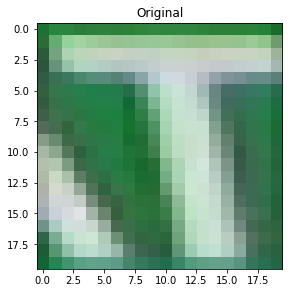

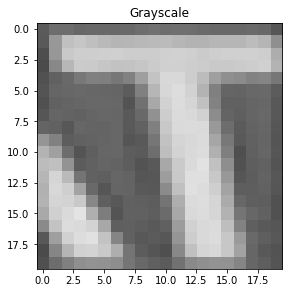

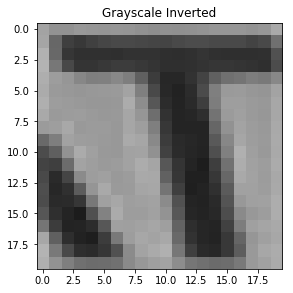

In [3]:
img = imread(..............)
imshow(img)
plt.title('Original')
plt.show()


img = imread(................)
imshow(img)
plt.title('Grayscale')
plt.show()

................
imshow(img)
plt.title('Grayscale Inverted')
plt.show()

Etiketleri karakterden ASCII değerine dönüştürmek için **map** fonksiyonunu kullanılır.

In [4]:
"""
In order to convert a label to an integer, we use ascii codes. map(ord, ....) converts characters 
to their values from ascii conversion table, and map(chr, ....) converts an integer to corresponging
character.
"""
yTrain=[]
for i in range(len(labelsInfoTrain)):
    yTrain.append(ord(labelsInfoTrain["Class"].iloc[i]))


print(np.shape(xTrain))
print(np.shape(yTrain))


(6283, 400)
(6283,)


# Tahmin

* Random Forest Classifier algoritması
* Karar ağacı sayısı 100

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Tahmin modeli kurulumu
rf = ...............

y_pred = ...................

y_pred2 = []
for i in range(len(y_pred)):
    y_pred2.append(chr(y_pred[i]))

labelsInfoTest['Class'] = y_pred2

labelsInfoTest.to_csv('Results_random_forest.csv', index=False)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Değerlendirmeyi doğruluk üzerinden yapılır.

Random Forest Classifier: 0.46

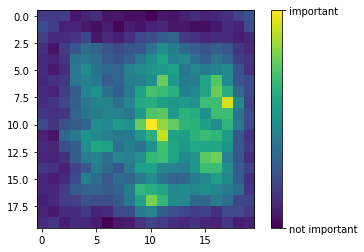

In [6]:
features = rf.feature_importances_
features = np.reshape(features,(20,20))
plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()]) 
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()


# İyileştirmeler (Data Augmentation)

In [7]:
#Veri setlerini zenginleştir
xTrain = np.append(............, axis = 0)
yTrain = np.append(............, axis = 0)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


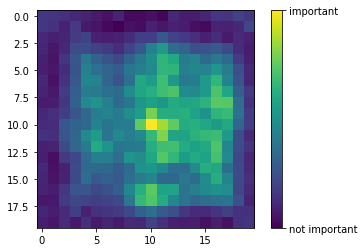

In [8]:
rf = RandomForestClassifier(n_estimators = 100,verbose=1)
rf.fit(xTrain,yTrain)
y_pred = rf.predict(xTest)
y_pred2 = []
for i in range(len(y_pred)):
    y_pred2.append(chr(y_pred[i]))

labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_random_forest_negative.csv', index=False)

features = rf.feature_importances_
features = np.reshape(features,(20,20))
plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()])  
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()

Doğruluk değeri 0.48 

In [9]:
"""
Used in order to normalize data:
Input: Grayscale image
Output: Same image converted to range white and black (0-1)
"""
def scale(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    minval = arr.min()
    maxval = arr.max()
    if minval != maxval:
        arr -= minval
        arr *= (255.0/(maxval-minval))
    return arr/255


Minimum value of a pixel 0.293496862745
Maximum value of a pixel 0.886862745098


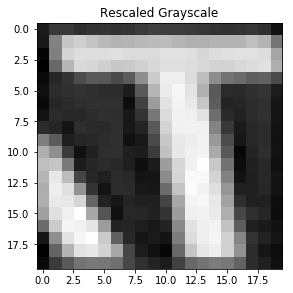

Minimum value of a pixel 0.0
Maximum value of a pixel 1.0


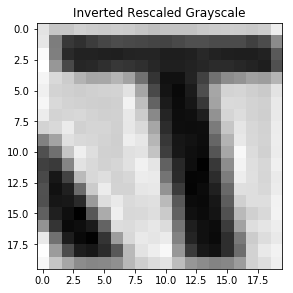

In [10]:
img = imread('trainResized/3.Bmp', as_grey=True)
print('Minimum value of a pixel ' + str(img.min()))
print('Maximum value of a pixel ' + str(img.max()))

img = scale(img)
#To avoid numerical instabilities
img[img >= 1] = 1
img[img <= 0] = 0
imshow(img)
plt.title('Rescaled Grayscale')
plt.show()
print('Minimum value of a pixel ' + str(img.min()))
print('Maximum value of a pixel ' + str(img.max()))

img = 1-img
imshow(img)
plt.title('Inverted Rescaled Grayscale')
plt.show()


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


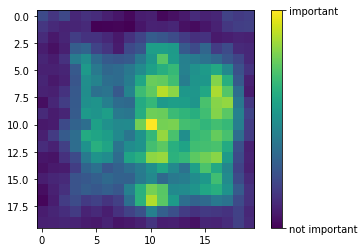

In [11]:
#Veri setlerini ölçeklendir
for i in range(len(xTrain)):
    ...............

for i in range(len(xTest)):
    ...............
                     
xTrain[xTrain > 1] = 1
xTrain[xTrain < 0] = 0
xTest[xTest > 1] = 1
xTest[xTest < 0] = 0

rf = RandomForestClassifier(n_estimators = 100,verbose=1)
rf.fit(xTrain,yTrain)
y_pred = rf.predict(xTest)
y_pred2 = []
for i in range(len(y_pred)):
    y_pred2.append(chr(y_pred[i]))

labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_random_forest_negative_rescaled.csv', index=False)


features = rf.feature_importances_
features = np.reshape(features,(20,20))
plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()])  # force there to be only 3 ticks
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()

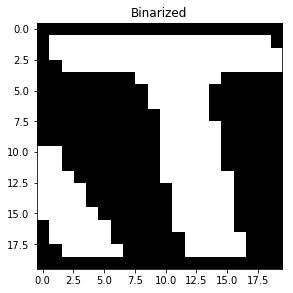

In [12]:
img = imread('trainResized/3.Bmp', as_grey=True)
img = scale(img)
img = (img >= 0.5) *1.0
imshow(img)
plt.title('Binarized')
plt.show()

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


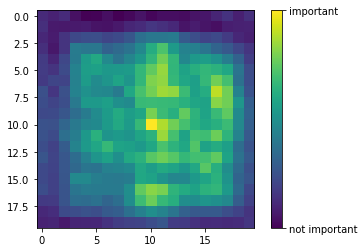

In [13]:
#Veri setlerini ikili hale çevir
.....................

rf = RandomForestClassifier(n_estimators = 100, verbose = 1)

rf.fit(xTrain,yTrain)
y_pred = rf.predict(xTest)
y_pred2 = []
for i in range(len(y_pred)):
    y_pred2.append(chr(y_pred[i]))

labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_random_forest_negative_rescaled_binary.csv', index=False)

features = rf.feature_importances_

features = np.reshape(features,(20,20))

plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()])  # force there to be only 3 ticks
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()